# Frequent Pattern Matching

## Import Libraries

In [4]:
import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)


import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

## Load Dataset

In [5]:
df = pd.read_csv("frequent.csv")
df.head()

df

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
310,Bread,Eggs,Cheese,NaN,NaN,NaN,NaN
311,Meat,Milk,Pencil,NaN,NaN,NaN,NaN
312,Bread,Cheese,Eggs,Meat,Pencil,Diaper,Wine
313,Meat,Cheese,NaN,NaN,NaN,NaN,NaN


## Preprocess Dataset

In [6]:
items = set()
for c in df:
    items.update(df[c].unique())

items = [x for x in items if not pd.isnull(x)]
print(items)

encoder = OneHotEncoder(sparse_output=False)
x = encoder.fit_transform(df)

columnNames = encoder.get_feature_names_out()
itemset = pd.DataFrame(x, columns=columnNames)
itemset.head()


['Cheese', 'Pencil', 'Bagel', 'Meat', 'Wine', 'Bread', 'Milk', 'Diaper', 'Eggs']


,0_Bagel,0_Bread,0_Cheese,0_Diaper,0_Eggs,0_Meat,0_Milk,0_Pencil,0_Wine,1_Bagel,...,6_Bagel,6_Bread,6_Cheese,6_Diaper,6_Eggs,6_Meat,6_Milk,6_Pencil,6_Wine,6_nan
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Drop Columns with NaN in Names

In [7]:
nans = [c for c in itemset.columns if c.find('nan') > -1]
itemset = itemset.drop(nans, axis=1)
itemset.head()

,0_Bagel,0_Bread,0_Cheese,0_Diaper,0_Eggs,0_Meat,0_Milk,0_Pencil,0_Wine,1_Bagel,...,5_Wine,6_Bagel,6_Bread,6_Cheese,6_Diaper,6_Eggs,6_Meat,6_Milk,6_Pencil,6_Wine
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Generate Frequent Itemsets

In [8]:
freq_items = apriori(itemset, min_support=0.2, use_colnames=True, verbose=1)
freq_items.head()

,support,itemsets
0,0.234921,(0_Bread)


## Encode Dataset (Alternative Approach)

In [9]:
# Re-encode dataset
itemset = set(items)
encoded = []
for index, row in df.iterrows():
    rowset = set(row)
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded.append(labels)

data = pd.DataFrame(encoded)
data.head()

# Generate Frequent Itemsets
freq_items = apriori(data, min_support=0.2, use_colnames=True, verbose=1)
freq_items.head()

Processing 4 combinations | Sampling itemset size 4


,support,itemsets
0,0.425397,(Bagel)
1,0.501587,(Milk)
2,0.501587,(Cheese)
3,0.361905,(Pencil)
4,0.476190,(Meat)


## Generation Association Rules

In [10]:
num_itemsets = len(data)

rules = association_rules(freq_items, num_itemsets=num_itemsets, metric='confidence', min_threshold=0.6)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,1.0,0.064641,1.442650,0.402687,0.429268,0.306831,0.605088
1,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,1.0,0.053172,1.270148,0.350053,0.436364,0.212690,0.607595
2,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,1.0,0.053172,1.270148,0.350053,0.436364,0.212690,0.607595
3,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,1.0,0.084958,1.477891,0.526414,0.495146,0.323360,0.662785
4,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,1.0,0.084958,1.557540,0.500891,0.495146,0.357962,0.662785


## Visualization: Support vs Confidence

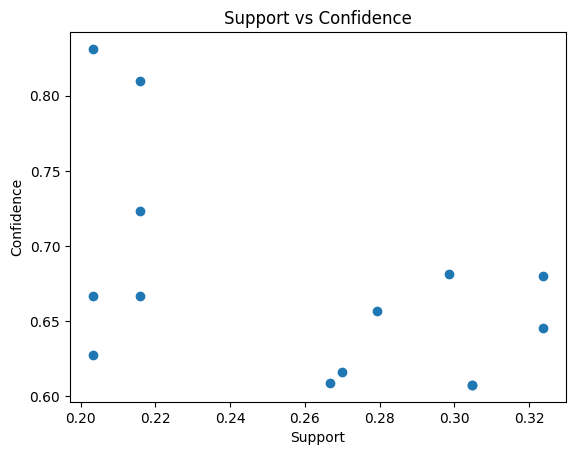

In [11]:
plt.scatter(rules['support'], rules['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

## Visualization: Support vs Lift

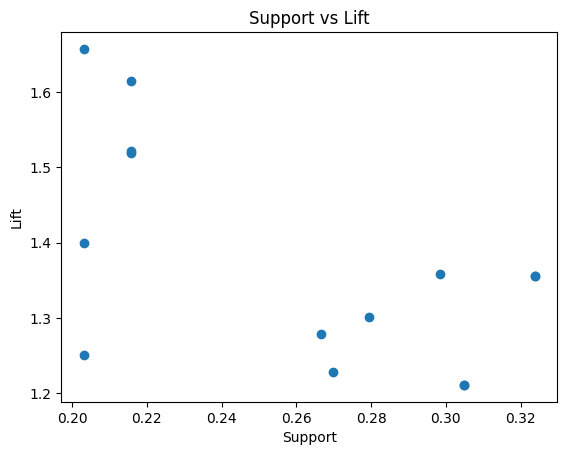

In [12]:
plt.scatter(rules['support'], rules['lift'])
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Support vs Lift')
plt.show()

## Visualization : Lift vs Confidence with Trendline

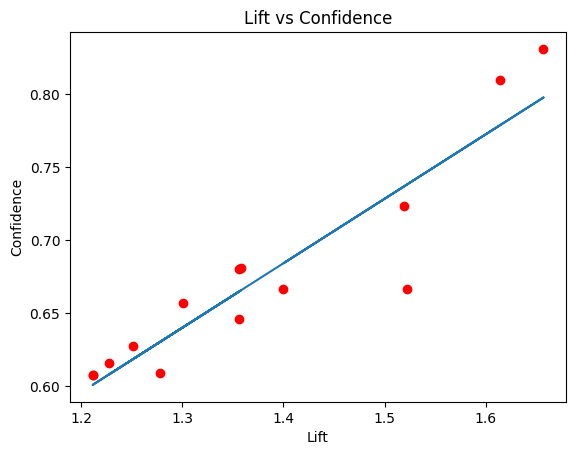

In [13]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
f = np.poly1d(fit)

plt.plot(rules['lift'], rules['confidence'], 'ro', rules['lift'], f(rules['lift']))
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('Lift vs Confidence')
plt.show()